# Οριακή ταχύτητα ράβδου σε ομογενές μαγνητικό πεδίο

## Με σταθερή δύναμη $F=mg$
Ο δεύτερος νόμος της κίνησης μας λέει ότι η επιτάχυνση $\vec a$ που αποκτά ένα σώμα είναι ανάλογη της συνισταμένης δύναμης $\Sigma \vec F$ και αντιστρόφως ανάλογη της μάζας $m$ του σώματος.
$$\vec a = \dfrac{\Sigma \vec F}{m}$$

### Επιτάχυνση, ταχύτητα και μετατόπιση

Θεωρούμε μία ράβδο μήκους $l$, αντίστασης $R$, μάζας $m$ η οποία είναι οριζόντια και αφήνεται να κινηθεί κατακόρυφα με την επίδραση του βάρους της. Η ράβδος είναι συνεχώς σε επαφή στους κατακόρυφους αγωγούς συστήματος αγωγών αμελητέας αντίστασης και σχήματος Π. Στον χώρο υπάρχει οριζόντιο μαγνητικό πεδίο $B$ κάθετο στο επίπεδο της ράβδου και των αγωγών.

Τότε ο δεύτερος νόμος μπορεί να γραφεί ως μία διαφορική εξίσωση ως προς την ταχύτητα $v$, αφού η επιτάχυνση $a$ είναι ο ρυθμός μεταβολής της ταχύτητας.

$$\dfrac{dv}{dt} = \dfrac{\Sigma F}{m}$$
$$\dfrac{dv}{dt} = \dfrac{mg - F_L}{m}$$

Ας λύσουμε αυτή την εξίσωση συμβολικά (και όχι αριθμητικά) με το sympy και την python...

Πρώτα φορτώνουμε τα πακέτα και καθορίζουμε το πως θα εμφανίζονται οι εξισώσεις.

In [172]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp

In [218]:
# Αν και δεν θα χρησιμοποιήσουμε το matplotilib το εισάγουμε για να καθορίσουμε τις διαστάσεις των διαγραμμάτων παρακάτω
# αφού το sympy χρησιμοποιεί εσωτερικά το matplotlib... 
# set figure size and font size for notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10,7)
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12

Ορίζουμε τα σύμβολα που θα χρησιμοποιήσουμε για τις μεταβλητές και τις συναρτήσεις μας.

In [219]:
# symbols
t = sp.Symbol('t', real=True)
m, g, l, R = sp.symbols('m g l R', positive=True, real=True)  # 
v0, x0, B = sp.symbols('v0 x0 B', real=True)
v = sp.Function('v')
x = sp.Function('x')
i = sp.Function('i')
E = sp.Function('E')
F = sp.Function('F')
a = sp.Function('a')

Ορίζουμε την ΗΕΔ $E$ από επαγωγή, $E=Bul$ , το ρεύμα $i = \frac{E}{R}$ και τη δύναμη Laplace $F_L = Bil$

In [220]:
E =  B*v(t)*l

In [176]:
i =  E/R

In [177]:
F =  B*i*l

Ορίζουμε την διαφορική εξίσωσή μας και την τυπώνουμε.

In [178]:
eq1 = sp.Eq(v(t).diff(t) - (m*g - F)/m, 0)

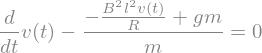

In [179]:
#simplify(eq1)
display(eq1)

Λύνουμε την εξίσωση με την συνάρτηση dsolve του sympy και έχουμε την γενική λύση της διαφορικής για την ταχύτητα της ράβδου:

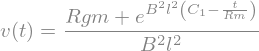

In [180]:
v_s0 = sp.dsolve(eq1)
display(v_s0)

Η λύση περιέχει μία αυθαίρετη σταθερά C1 η οποία εξαρτάται από τις αρχικές συνθήκες. Ορίζουμε λυπόν $v(0)=0$ για $t=0$. Έτσι βρίσκουμε μία εξίσωση που περιέχει το C1.

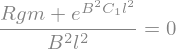

In [181]:
cond = sp.Eq(v_s0.rhs.subs(t,0), 0) #v_0 = 0
display(cond)

Λύνουμε την παραπάνω συνθήκη ως προς C1.

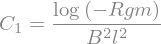

In [192]:
C1 = sp.Symbol('C1')
C = sp.solve(cond,C1)
eq2 = sp.Eq(C1, C[0])
display(eq2)

Αντικαθιστούμε την τιμή της σταθεράς C1 που βρήκαμε με την αρχική συνθήκη στην εξίσωση.

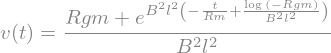

In [195]:
v_s = v_s0.subs("C1", C[0])
simplify(v_s)
display(v_s)

Από την τελευταία εξίσωση παραγωγίζουμε και βρίσκουμε την συνάρτηση της επιτάχυνσης $a(t)$

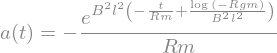

In [196]:
eq3 = sp.Eq(a(t), v_s.rhs.diff(t))
display(eq3)

Ορίζουμε μία νέα διαφορική εξίσωση για την θέση $x$ του σώματος από την ταχύτητα που βρήκαμε παραπάνω. Με την ίδια διαδικασία λύνουμε την διαφορική για την θέση $x$, και αντικαθιστούμε την σταθερά ολοκλήρωσης C1 με την αρχική συνθήκη για το $x(0)=0$

Η διαφορική εξίσωση για τη θέση x(t):

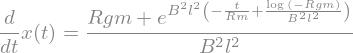

In [223]:
dxdt = sp.Eq(x(t).diff(t), v_s.rhs)
display(dxdt)

Η λύση της διαφορικής για τη θέση x(t):

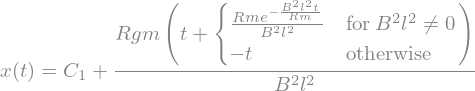

In [225]:
x_s0 = sp.dsolve(dxdt)
display(x_s0)

Αντικαθιστούμε την αρχική συνθήκη και υπολογίζουμε την C1

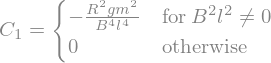

In [226]:
condx = sp.Eq(x_s0.rhs.subs(t,0), 0) #x_0=0
C1 = sp.Symbol('C1')
C = sp.solve(condx, C1)
eq4 = sp.Eq(C1, C[0])
display(eq4)

Αντικαθιστούμε την C1 στην εξίσωση. Η τελική εξίσωση για τη θέση, μετά την αντικατάσταση του C1

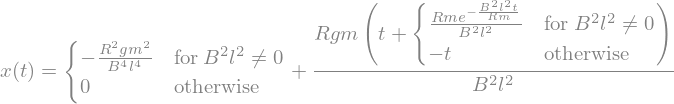

In [227]:
x_s = x_s0.subs(C1, C[0])
display(x_s)

Και στο τέλος, αντικαθιστούμε τις διάφορες μεταβλητές-σταθερές στις εξισώσεις για την επιτάχυνση, την ταχύτητα και την θέση του σώματος.

Έτσι προκύπτουν οι τελικές συναρτήσεις $a=f(t)$, $v=g(t)$ και $x=h(t)$.

In [228]:
# Give typical values to the parameters (SI)
at_f= at.subs([(g, 10), (m, 0.5), (l, 1), (B,1), (R,2)])
v_sf = v_s.subs([(g, 10), (m, 0.5), (l, 1), (B,1), (R,2)])
x_sf = x_s.subs([(g, 10), (m, 0.5), (l, 1), (B,1), (R,2)])
#display('Με αντικατάσταση των μεταβλητών g, l, m, B, R προκύπτει η τελική σχέση:')
display(v_sf)
display(x_sf)
display(at_f)

Τώρα είμαστε στην ευχάριστη θέση να σχεδιάσουμε τις γραφικές μας παραστάσεις με το sympy.plot για τα πρώτα 8 δευτερόλεπτα της κίνησης (τα οποία είναι αρκετά για να αποκτήσει η ράβδος οριακή ταχύτητα)

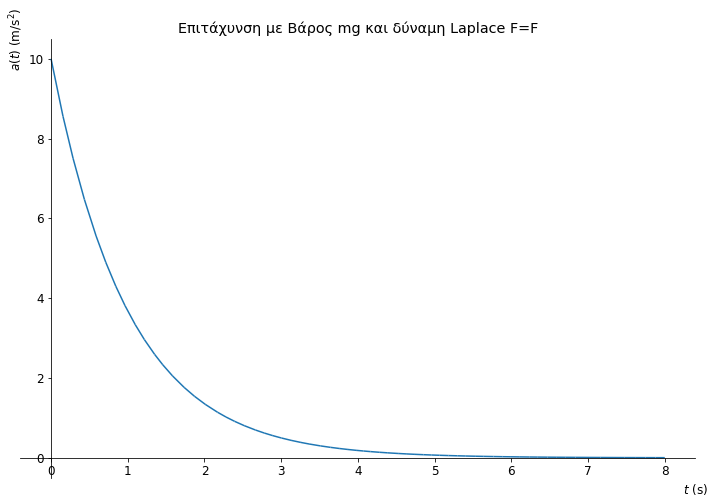

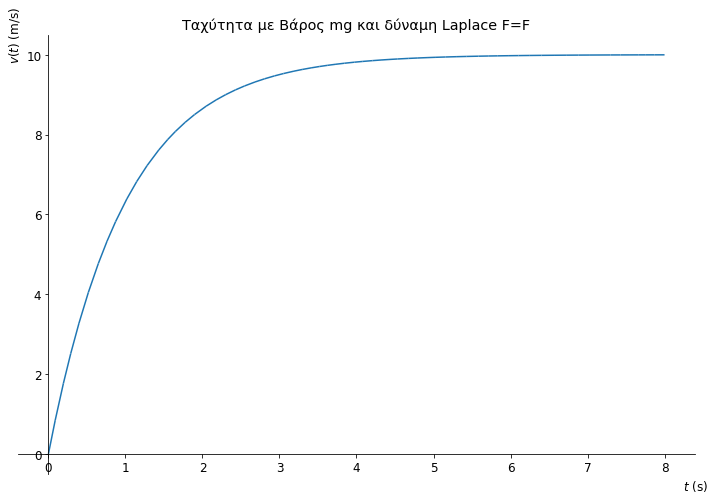

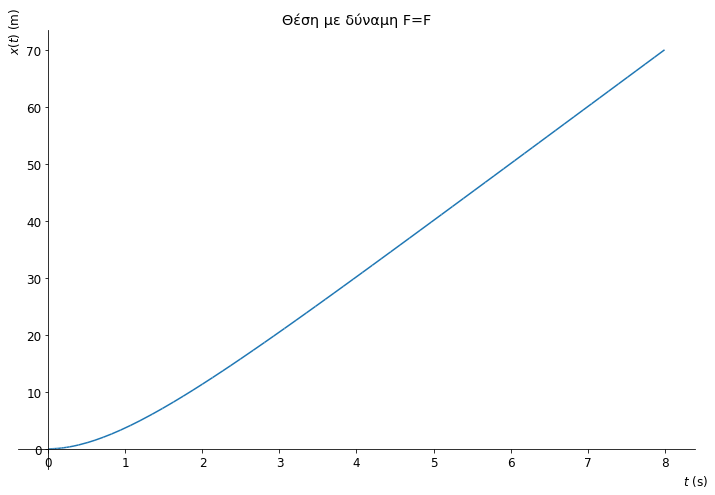

In [221]:
# one way to plot using symbolic math
sp.plot((at_f.rhs, (t, 0, 8)), title='Επιτάχυνση με Βάρος mg και δύναμη Laplace F={}'.format(F), ylabel='$a(t)$ (m/s$^2$)', xlabel='$t$ (s)')
sp.plot((v_sf.rhs, (t, 0, 8)), title='Ταχύτητα με Βάρος mg και δύναμη Laplace F={}'.format(F), ylabel='$v(t)$ (m/s)', xlabel='$t$ (s)')
sp.plot((x_sf.rhs, (t, 0, 8)), title='Θέση με δύναμη F={}'.format(F), ylabel='$x(t)$ (m)', xlabel='$t$ (s)')

Μπορούμε να θεωρήσουμε ότι την στιγμή $t=6$s η ράβδος έχει πλέον οριακή ταχύτητα. Θα έχει όμως διανύσει διάστημα γύρω στα 50m!

### Επαγωγική τάση, ρεύμα και φορτίο

Αφού φτάσαμε μέχρι εδώ ας υπολογίσουμε και την επαγωγική τάση, το ρεύμα και το φορτίο που διέρχονται από τον αγωγό μας, καθώς πέφτει στο μαγνητικό πεδίο.

In [243]:
E = B*v_sf.rhs*l
E = E.subs([(l, 1), (B,1)])
Et = sp.Symbol("E(t)")
eqEt = sp.Eq(Et, E)
display(eqEt)

In [245]:
i = E/R
i = i.subs([(R, 2)])
it = sp.Symbol("i(t)")
eqit = sp.Eq(it, i)
display(eqit)

In [249]:
q = sp.Function('q')
q1 = sp.integrate(i, t)
# Προσθέτουμε χειροκίνητα την σταθερά ολοκλήρωσης C1=-5, ώστε q(0)=0
q = q1 - 5
qt = sp.Symbol("q(t)")
eqqt = sp.Eq(qt, q)
display(eqqt)

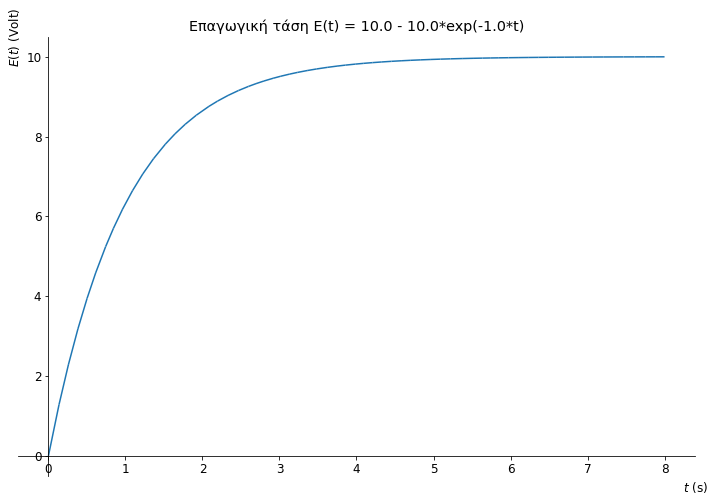

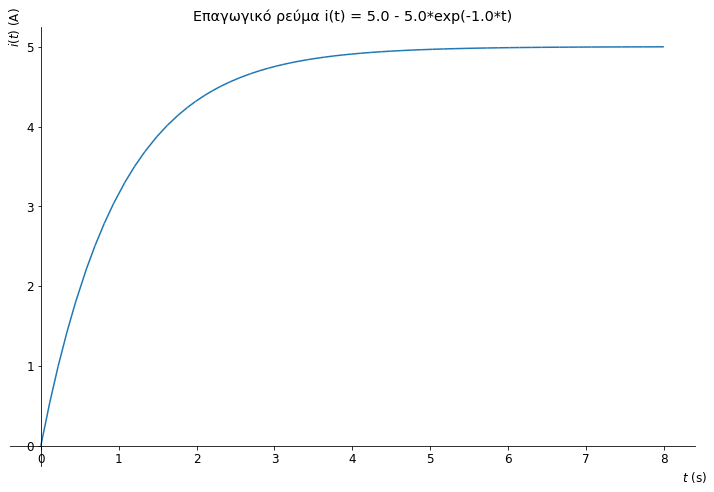

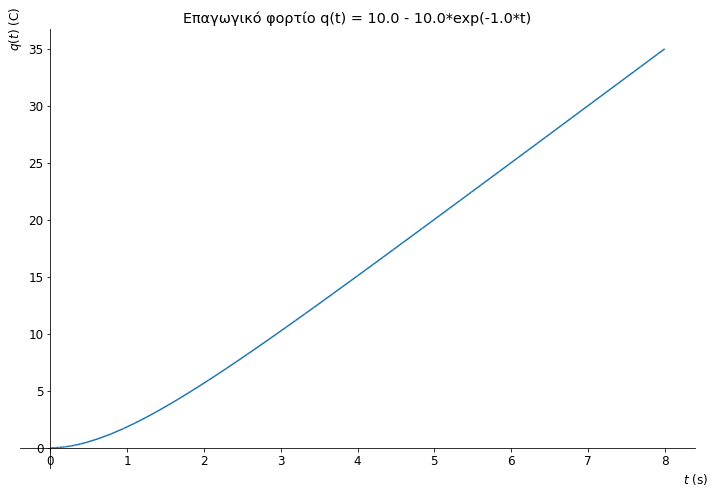

In [250]:
sp.plot((E, (t, 0, 8)), title='Επαγωγική τάση Ε(t) = {}'.format(E), ylabel='$E(t)$ (Volt)', xlabel='$t$ (s)')
sp.plot((i, (t, 0, 8)), title='Επαγωγικό ρεύμα i(t) = {}'.format(i), ylabel='$i(t)$ (A)', xlabel='$t$ (s)')
sp.plot((q, (t, 0, 8)), title='Επαγωγικό φορτίο q(t) = {}'.format(E), ylabel='$q(t)$ (C)', xlabel='$t$ (s)')